## Importing and preparing the data

In [1]:
import pickle
with open("mypickle.pickle", "rb") as f:
    b,m,x_list,y_list,output_list=pickle.load(f)

In [2]:
datapoints=[]
for i in range(len(x_list)):
    datapoints.append((x_list[i],y_list[i],output_list[i]))

In [3]:
import Percepton as P

## Testing comparer function

In [4]:
test_vec=[2.4,2,1]

(-1, 1)

(-1, 1)

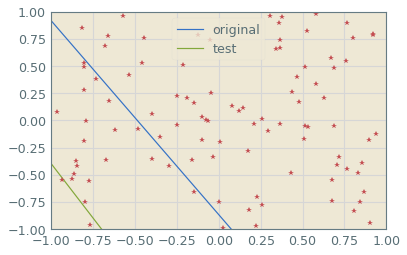

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def new_line(x):
    '''This is the original line'''
    return m*x+b
test_line=P.vec_to_lin(test_vec)
domain = np.linspace(-1, 11)
plt.plot(domain, new_line(domain),label='original')
plt.plot(domain, test_line(domain),label='test')
plt.plot(x_list,y_list,linestyle='None',marker='*')
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [6]:
for x,y,z in datapoints:
    print(x,y)
    print(P.comparer([0,0,0],x,y,z))

0.507641952635671 -0.17113137683066393
False
0.9237801966642845 0.7979286802109005
False
-0.018243465215310284 0.8401855464671995
False
-0.44865906444484493 0.7557931974031955
False
0.4697592025724897 0.4024713699537188
False
0.5814073249568714 0.3372477380153094
False
0.25920147262258286 0.010921919760097598
False
0.8454673694040369 -0.7526886803380568
False
0.3568267641764167 0.9005796069007757
False
0.4321735178767123 -0.48639174662005424
False
-0.2479604611802999 -0.04585238520274859
False
0.6860270247410489 -0.04691830310452083
False
0.18311658094639172 -0.8212540178901273
False
0.8565956430546029 -0.38788182979188
False
0.899672798254979 -0.18097716533122643
False
-0.804707972434366 0.27728256063318635
False
-0.07497168077760819 0.004079600388829929
False
-0.6823484329128195 0.6890570584766995
False
0.9363115537357156 -0.12041342396299681
False
-0.044080902979754644 0.24854296248456897
False
0.43523261342743447 0.2577924631457915
False
0.806877905710949 -0.833378129991807
False
-

## Verifying PLA

In [7]:
final_weight_vector,counter=P.PLA([0,0,0],datapoints)
final_weight_vector
counter
#prob

[2, 4.5968097139143, 2.269856257016831]

35

(-1, 1)

(-1, 1)

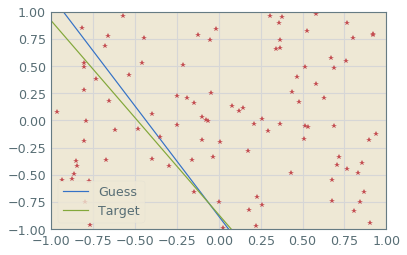

In [8]:
final_line=P.vec_to_lin(final_weight_vector)
plt.plot(domain,final_line(domain),label='Guess')
plt.plot(domain,new_line(domain), label='Target')
plt.plot(x_list,y_list,linestyle='None',marker='*')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

## Testing list_classifier and Probability

In [9]:
import PerceptonSetup as setup

(-1, 1)

(-1, 1)

/home/benson/Software/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


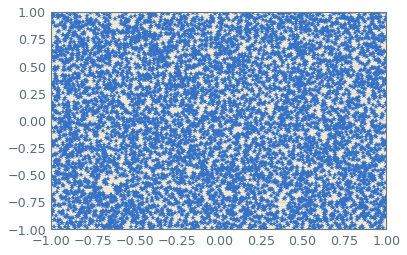

In [10]:
x_sample_points,y_sample_points=setup.random_points(8000)
plt.plot(x_sample_points,y_sample_points,linestyle='None',marker='*')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In [11]:
P.Probability(test_vec)
P.Probability(final_weight_vector)

0.23387500000000006

0.025249999999999995

## Finally, Answers to the Homework

In [12]:
%load_ext line_profiler

In [13]:
%lprun -f P.Probability P.Probability(final_weight_vector)

In [25]:
%lprun -f P.PLA P.PLA([0,0,0],datapoints)

In [14]:
average_counter_list=np.zeros(1000)
average_probability=0
for i in range(1000):
    weight_vector, counter = P.PLA([0,0,0],datapoints)
    average_counter_list[i]=counter
    average_probability=average_probability+ P.Probability(weight_vector)
average_counter = np.sum(average_counter_list)/1000
average_probability = average_probability/1000

In [15]:
average_counter
average_probability

55.755000000000003

0.012665875000000005

(array([ 242.,  381.,  206.,   97.,   47.,   16.,    3.,    6.,    1.,    1.]),
 array([   6. ,   32.4,   58.8,   85.2,  111.6,  138. ,  164.4,  190.8,
         217.2,  243.6,  270. ]),
 <a list of 10 Patch objects>)

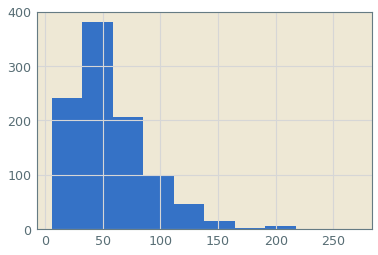

In [16]:
plt.hist(average_counter_list)
plt.show()

## Testing syntax stuff

In [17]:
a=[1,2,3]
P.innerproduct(a,2,2)

11

In [18]:
## Testing syntax
tuple_test=[(1,2,3),(4,5,6)]

for x,y,z in tuple_test:
    print(x)
    print(y)
    print(z)

1
2
3
4
5
6


In [19]:
## testing multiple output syntax
def add(x):
    return x+1,x+2
asf1,adaf3=add(2)
asf1
adaf3

3

4

In [20]:
## Testing break syntax
i=0
while i<5:
    i=i+1
    for x in range(4):
        if x<1:
            print("hi")
        else:
            break

hi
hi
hi
hi
hi


In [21]:
## Testing adjust synatx
ads=[x1 + x2 for (x1, x2) in zip([0,0,0], [1,2,3])]
ads

[1, 2, 3]

In [22]:
## Testing Boolean Broadcasting
test_matching_list=np.array([True,True,False])==np.array([True,False,True])
np.sum(test_matching_list)

1

In [23]:
##Testing how a multi-value output is formatted
def two():
    return 1,2
two_test=[two() for i in range(5)]
type(two_test[0])

tuple